# 1. Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Dados

## 2.1. Import

In [2]:
root_path = os.path.abspath('..')
data_path = os.path.join(root_path, 'notebooks')
extra_medidas_path = os.path.join(root_path, 'extra', 'medidas_governamentais')

In [3]:
noticias_filename = 'noticias_en_classification.csv'
tweets_filename = 'tweets_en_classification.csv'
medidas_filename = 'medidas_governamentais.csv'

In [4]:
noticias_path = os.path.join(data_path, noticias_filename)
tweets_path = os.path.join(data_path, tweets_filename)
medidas_path = os.path.join(extra_medidas_path, medidas_filename)

In [5]:
noticias = pd.read_csv(noticias_path, index_col='Unnamed: 0')

In [6]:
tweets = pd.read_csv(tweets_path, index_col='Unnamed: 0').drop(columns='Unnamed: 0.1')

In [7]:
medidas = pd.read_csv(medidas_path)

## 2.2. Cleaning

### 2.2.1. NaNs

#### 2.2.1.1 Notícias

In [8]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37593 entries, 0 to 37592
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      37593 non-null  object 
 1   titulo                    37593 non-null  object 
 2   descricao                 37241 non-null  object 
 3   source                    37593 non-null  object 
 4   titulo_clean              37592 non-null  object 
 5   titulo_en                 37592 non-null  object 
 6   classification            37593 non-null  object 
 7   score                     37593 non-null  float64
 8   descricao_clean           37221 non-null  object 
 9   descricao_en              37221 non-null  object 
 10  descricao_classification  37593 non-null  object 
 11  descricao_score           37593 non-null  float64
dtypes: float64(2), object(10)
memory usage: 3.7+ MB


In [9]:
index_descricao_null = noticias[noticias.descricao.isnull().values].index

In [10]:
noticias[noticias.descricao.isnull().values].source.value_counts()

publico    352
Name: source, dtype: int64

In [11]:
index_titulo_clean_null = noticias[noticias.titulo_clean.isnull().values].index

In [12]:
noticias[noticias.titulo_clean.isnull().values].source.value_counts()

observador    1
Name: source, dtype: int64

In [13]:
index_descricao_clean_null = noticias[noticias.descricao_clean.isnull().values].index

In [14]:
noticias[noticias.descricao_clean.isnull().values].source.value_counts()

publico    372
Name: source, dtype: int64

In [15]:
noticias.titulo[index_titulo_clean_null].values

array([' '], dtype=object)

In [16]:
# lets get the descricao_clean that have descricao not null
index_descricao_clean_null_weird = set(index_descricao_clean_null) - set(index_descricao_null)

In [17]:
noticias.descricao[index_descricao_clean_null_weird].values

array([' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' '], dtype=object)

***
Time to remove these NaNs classifications...
***

In [18]:
noticias.loc[index_titulo_clean_null, 'classification'] = np.nan

In [19]:
noticias.loc[index_titulo_clean_null, 'score'] = np.nan

In [20]:
noticias.loc[index_descricao_clean_null, 'descricao_classification'] = np.nan

In [21]:
noticias.loc[index_descricao_clean_null, 'descricao_score'] = np.nan

***
Now lets get rid of them
***

In [22]:
noticias = noticias.dropna()

In [23]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37220 entries, 0 to 37592
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      37220 non-null  object 
 1   titulo                    37220 non-null  object 
 2   descricao                 37220 non-null  object 
 3   source                    37220 non-null  object 
 4   titulo_clean              37220 non-null  object 
 5   titulo_en                 37220 non-null  object 
 6   classification            37220 non-null  object 
 7   score                     37220 non-null  float64
 8   descricao_clean           37220 non-null  object 
 9   descricao_en              37220 non-null  object 
 10  descricao_classification  37220 non-null  object 
 11  descricao_score           37220 non-null  float64
dtypes: float64(2), object(10)
memory usage: 3.7+ MB


#### 2.2.1.2. Tweets

In [24]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 0 to 21139
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21140 non-null  object 
 1   date            21140 non-null  object 
 2   username        21140 non-null  object 
 3   text            21140 non-null  object 
 4   hashtag         4830 non-null   object 
 5   geo             1 non-null      object 
 6   text_clean      21140 non-null  object 
 7   text_en         21140 non-null  object 
 8   classification  21140 non-null  object 
 9   score           21140 non-null  float64
dtypes: float64(1), object(9)
memory usage: 1.8+ MB


In [25]:
tweets = tweets.drop(columns=['hashtag', 'geo'])

In [26]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 0 to 21139
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21140 non-null  object 
 1   date            21140 non-null  object 
 2   username        21140 non-null  object 
 3   text            21140 non-null  object 
 4   text_clean      21140 non-null  object 
 5   text_en         21140 non-null  object 
 6   classification  21140 non-null  object 
 7   score           21140 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.5+ MB


### 2.2.2. Converting classification to -1/1

In [27]:
map_dict = {'NEGATIVE': -1, 'POSITIVE': 1}

In [28]:
noticias.loc[:, 'classification'] = noticias.classification.map(map_dict)
noticias.loc[:, 'descricao_classification'] = noticias.descricao_classification.map(map_dict)
tweets.loc[:, 'classification'] = tweets.classification.map(map_dict)

In [29]:
noticias.classification.value_counts()

-1    27129
 1    10091
Name: classification, dtype: int64

In [30]:
noticias.descricao_classification.value_counts()

-1    28238
 1     8982
Name: descricao_classification, dtype: int64

In [31]:
tweets.classification.value_counts()

-1    15439
 1     5701
Name: classification, dtype: int64

### 2.2.3. Converting dates to datetime objects

In [32]:
noticias['data'] = pd.to_datetime(noticias['data'], errors= "coerce").dt.tz_localize(None)

In [33]:
tweets['date'] = pd.to_datetime(tweets['date'], errors= "coerce").dt.tz_localize(None)

In [34]:
medidas['data'] = pd.to_datetime(medidas['data'], errors= "coerce", dayfirst=True).dt.tz_localize(None)

In [35]:
noticias.data.dtypes # same as datetime64[ns]

dtype('<M8[ns]')

In [36]:
tweets.date.dtypes # same as datetime[ns]

dtype('<M8[ns]')

In [37]:
medidas.data.dtypes # same as datetime[ns]

dtype('<M8[ns]')

# 3. Análise

In [38]:
medidas.groupby(pd.Grouper(key='data', freq='MS')).count()

,local,tipo,desc
data,,,
2020-03-01,32,32,32
2020-04-01,18,18,18
2020-05-01,40,40,40
2020-06-01,17,17,17
2020-07-01,13,13,13


In [39]:
tweets['weighted_classification'] = tweets.classification * tweets.score

In [40]:
noticias['weighted_classification'] = noticias.classification * noticias.score

In [41]:
noticias['weighted_desc_classification'] = noticias.descricao_classification * noticias.descricao_score

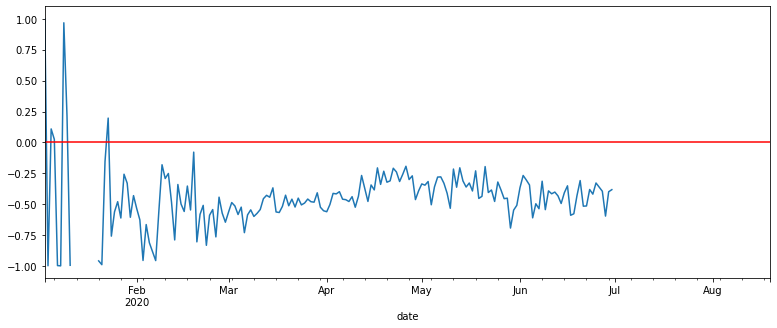

In [42]:
tweets.groupby(pd.Grouper(key='date', freq='D'))['weighted_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

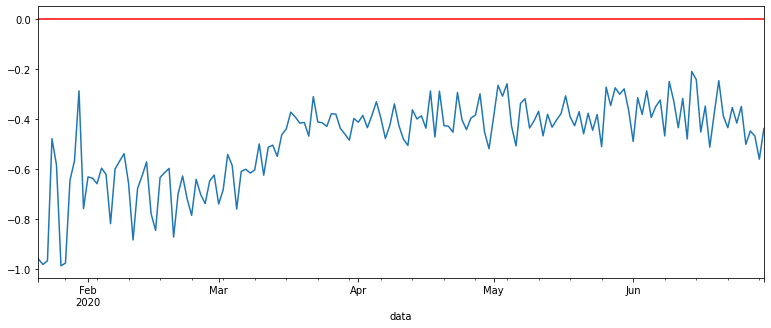

In [43]:
noticias.groupby(pd.Grouper(key='data', freq='D'))['weighted_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

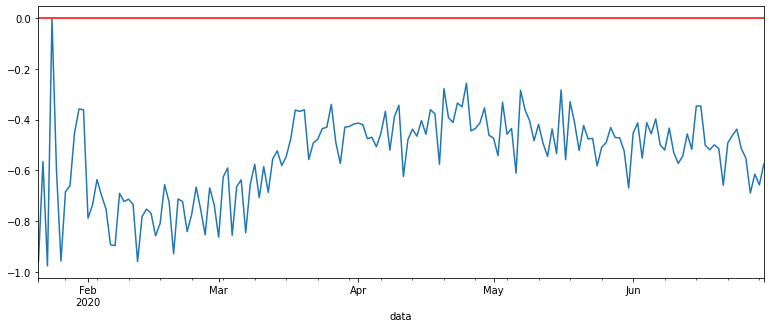

In [44]:
noticias.groupby(pd.Grouper(key='data', freq='D'))['weighted_desc_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

In [45]:
def plot_sentiment(df,
                   date_name,
                   classification_name,
                   freq,
                   agg_name='mean',
                   fig_size=(13, 5),
                   plot_type='line',
                   plot_zero_line=False):
    df.groupby(pd.Grouper(key=date_name, freq=freq))[classification_name]\
        .agg(agg_name)\
        .plot(figsize=fig_size, kind=plot_type)
    if plot_zero_line:
        plt.axhline(y=0.0, color='r', linestyle='-')

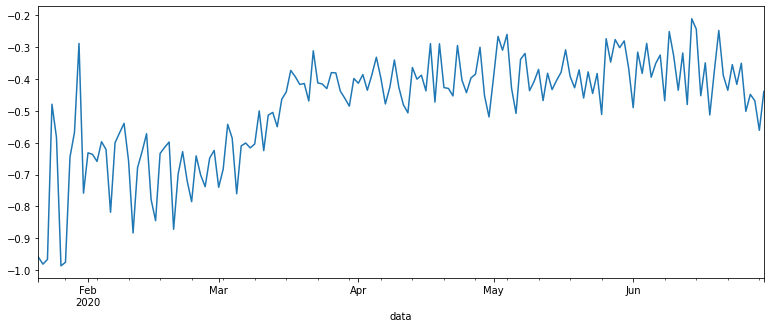

In [46]:
plot_sentiment(noticias, 'data', 'weighted_classification', 'D',)

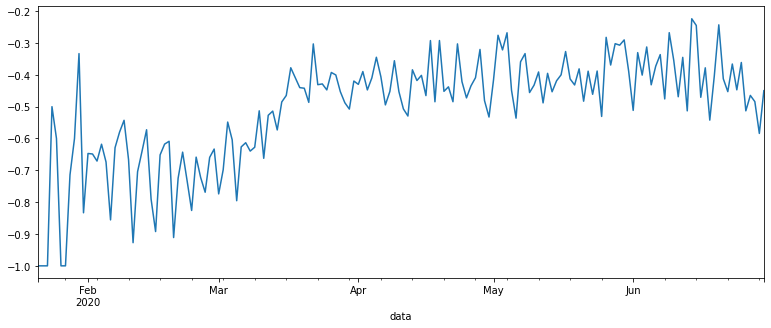

In [47]:
plot_sentiment(noticias, 'data', 'classification', 'D',)

In [48]:
medidas.data.dt.date.unique()[0]

datetime.date(2020, 3, 8)

In [49]:
def get_adjacent_dates_idx(df_date_values, date_to_find):
    if date_to_find in df_date_values:
        idx = np.where(df_date_values == date_to_find)[0][0]
        idx_before = idx - 1
        idx_after = idx + 1
    else:
        idx_before = np.where(df_date_values < date_to_find)[0][-1]
        idx_after = idx_before + 1
    return (idx_before, idx_after)

In [50]:
def group_df(df, key_name, freq_name, clf_name, agg_name, reset_index=True, dropna=True):
    new_df = df.groupby(pd.Grouper(key=key_name, freq=freq_name))[clf_name].agg(agg_name)
    if reset_index:
        new_df = new_df.reset_index()
    if dropna:
        new_df = new_df.dropna()
    return new_df

In [51]:
def get_unique_dates(df, date_name):
    return df[date_name].dt.date.unique()

In [52]:
df_temp = tweets.groupby(pd.Grouper(key='date', freq='D'))['weighted_classification'].agg('mean').reset_index().dropna()
medidas_dates = medidas.data.dt.date.unique()
tweet_dates = df_temp.date.dt.date.values

In [53]:
df_temp = group_df(tweets, 'date', 'D', 'weighted_classification', 'mean')
medidas_dates = get_unique_dates(medidas, 'data')
tweets_dates = get_unique_dates(df_temp, 'date')

In [54]:
def get_sentiment_changes(df_data, df_events, df_data_key, df_events_key, clf_name):
    events_dates = get_unique_dates(df_events, df_events_key)
    data_dates = get_unique_dates(df_data, df_data_key)
    ans_dict = dict()
    for date in events_dates:
        before_idx, after_idx = get_adjacent_dates_idx(data_dates, date)
        before_date = data_dates[before_idx]
        after_date = data_dates[after_idx]
        sentiment_before = df_data[data_dates == before_date][clf_name].values[0]
        sentiment_after = df_data[data_dates == after_date][clf_name].values[0]
        if date in data_dates:
            sentiment_middle = df_data[data_dates == date][clf_name].values
        else:
            sentiment_middle = [np.nan]
        ans_dict[date] = {'before_date': before_date,
                          'before_sentiment': sentiment_before,
                          'middle_date': date,
                          'middle_sentiment': sentiment_middle[0],
                          'after_date': after_date,
                          'after_sentiment': sentiment_after}
    return ans_dict

In [55]:
change_dict = get_sentiment_changes(df_temp, medidas, 'date', 'data', 'weighted_classification')

In [56]:
for date, value in change_dict.items():
    print(date, ':', round(value['before_sentiment'], 2), '->', round(value['middle_sentiment'], 2), '->', round(value['after_sentiment'], 2))

2020-03-08 : -0.59 -> -0.54 -> -0.6
2020-03-12 : -0.54 -> -0.45 -> -0.43
2020-03-13 : -0.45 -> -0.43 -> -0.44
2020-03-14 : -0.43 -> -0.44 -> -0.37
2020-03-15 : -0.44 -> -0.37 -> -0.56
2020-03-16 : -0.37 -> -0.56 -> -0.57
2020-03-17 : -0.56 -> -0.57 -> -0.52
2020-03-18 : -0.57 -> -0.52 -> -0.43
2020-03-19 : -0.52 -> -0.43 -> -0.51
2020-03-22 : -0.46 -> -0.52 -> -0.45
2020-03-23 : -0.52 -> -0.45 -> -0.5
2020-03-26 : -0.49 -> -0.46 -> -0.48
2020-04-02 : -0.56 -> -0.5 -> -0.41
2020-04-03 : -0.5 -> -0.41 -> -0.42
2020-04-09 : -0.48 -> -0.44 -> -0.52
2020-04-17 : -0.38 -> -0.21 -> -0.34
2020-04-30 : -0.46 -> -0.39 -> -0.34
2020-05-03 : -0.35 -> -0.32 -> -0.5
2020-05-04 : -0.32 -> -0.5 -> -0.36
2020-05-07 : -0.28 -> -0.28 -> -0.33
2020-05-15 : -0.31 -> -0.36 -> -0.33
2020-05-18 : -0.39 -> -0.23 -> -0.45
2020-05-30 : -0.69 -> -0.55 -> -0.51
2020-06-01 : -0.51 -> -0.37 -> -0.27
2020-06-09 : -0.31 -> -0.54 -> -0.39
2020-06-15 : -0.49 -> -0.41 -> -0.35
2020-06-23 : -0.51 -> -0.38 -> -0.42
2020-07

***
TODO
- generalizar a mudança para uma média de dias: _FEITO_
- visualizar estas mudanças
- fazer para tweets, títulos e descrições
***

In [57]:
def get_adjacent_date_window_idx(df_date_values, date_to_find, window_size=1):
    window = range(1, window_size+1)
    idx_before = list()
    idx_after = list()
    for pos in window:
        if date_to_find in df_date_values:
            idx = np.where(df_date_values == date_to_find)[0][0]
            idx_before.append(idx - pos)
            idx_after.append(idx + pos)
        else:
            idx_before.append(np.where(df_date_values < date_to_find)[0][-pos])
            idx_after.append(idx_before + pos)
    return (idx_before, idx_after)

In [58]:
events_dates = get_unique_dates(medidas, 'data')
data_dates = get_unique_dates(df_temp, 'date')
ans_dict = dict()
for date in events_dates:
    before_idx, after_idx = get_adjacent_date_window_idx(data_dates, date, 2)
    for b_idx, a_idx in zip(before_idx, after_idx):
        before_date = data_dates[b_idx]
        after_date = data_dates[a_idx]
        print(before_date, date, after_date)

2020-03-07 2020-03-08 2020-03-09
2020-03-06 2020-03-08 2020-03-10
2020-03-11 2020-03-12 2020-03-13
2020-03-10 2020-03-12 2020-03-14
2020-03-12 2020-03-13 2020-03-14
2020-03-11 2020-03-13 2020-03-15
2020-03-13 2020-03-14 2020-03-15
2020-03-12 2020-03-14 2020-03-16
2020-03-14 2020-03-15 2020-03-16
2020-03-13 2020-03-15 2020-03-17
2020-03-15 2020-03-16 2020-03-17
2020-03-14 2020-03-16 2020-03-18
2020-03-16 2020-03-17 2020-03-18
2020-03-15 2020-03-17 2020-03-19
2020-03-17 2020-03-18 2020-03-19
2020-03-16 2020-03-18 2020-03-20
2020-03-18 2020-03-19 2020-03-20
2020-03-17 2020-03-19 2020-03-21
2020-03-21 2020-03-22 2020-03-23
2020-03-20 2020-03-22 2020-03-24
2020-03-22 2020-03-23 2020-03-24
2020-03-21 2020-03-23 2020-03-25
2020-03-25 2020-03-26 2020-03-27
2020-03-24 2020-03-26 2020-03-28
2020-04-01 2020-04-02 2020-04-03
2020-03-31 2020-04-02 2020-04-04
2020-04-02 2020-04-03 2020-04-04
2020-04-01 2020-04-03 2020-04-05
2020-04-08 2020-04-09 2020-04-10
2020-04-07 2020-04-09 2020-04-11
2020-04-16

TypeError: can only concatenate list (not "int") to list

In [59]:
df = pd.DataFrame.from_dict(change_dict, orient='index')

In [60]:
df['before_date'] = pd.to_datetime(df['before_date'], errors= "coerce").dt.tz_localize(None)

In [62]:
print(df.before_sentiment.min())
print(df.before_sentiment.max())
print(df.after_sentiment.min())
print(df.after_sentiment.max())
print(df.after_sentiment.max() - df.before_sentiment.min())

-0.6922331161615325
-0.28006157937802767
-0.5981807456047403
0.9940541982650756
1.686287314426608


In [63]:
df['change'] = df.after_sentiment - df.before_sentiment

In [64]:
print(df.change.max())
print(df.change.min())

1.3757164729268927
-0.19935438729969235


In [65]:
y_ticks = list(np.arange(-0.75, -0.25, (-0.25-(-0.75))/9))
print(y_ticks)

[-0.75, -0.6944444444444444, -0.6388888888888888, -0.5833333333333333, -0.5277777777777777, -0.4722222222222221, -0.4166666666666665, -0.36111111111111094, -0.30555555555555536]


In [104]:
# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)

In [107]:
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'])):
    if (i < dates_size-2):
        if(abs(p[1]-p[0]) > 0.15):
            print(dates_middle[i])
            print(medidas[medidas['data'] == dates_middle[i]]['desc'].values)
            print()

2020/03/16
['Limites à circulação da fronteira com Espanha, limitando-a à circulação de trabalhadores transfronteiriços e mercadorias'
 'Fecho de todos os estabelecimentos de ensino'
 'Reposto temporariamente o controlo documental na fronteira com Espanha']

2020/05/03
['Decretado Estado de Calamidade']

2020/05/30
['Celebrações comunitárias de cerimónias religiosas com regras a definir entre DGS e confissões religiosas'
 'Reabertura das competições oficiais da Primeira Liga de futebol e da Taça de Portugal']

2020/06/01
['Teletrabalho parcial, com horários desfasados ou equipas em espelho'
 'Abertura de lojas de cidadão'
 'Abertura de lojas com área superior a quatrocentos metros quadrados ou inseridas em centros comerciais'
 'Abertura de creches, pré-escolar e ATLs'
 'Abertura de cinemas, teatros, auditórios e salas de espectáculos, com lugares marcados, lotação reduzida e distanciamento físico']



In [179]:
def wrap_text(text_block):
    new_textlines = list()
    for textline in ['- ' + desc for desc in text_block]:
        if len(textline) < 75:
            new_textlines.append(textline)
        else:
            temptext_list = textline.split(' ')
            temptext_len = np.array([len(word) for word in temptext_list])
            temptext_cumulative = np.cumsum(temptext_len)
            idx = np.where(temptext_cumulative > 70)[0][0]-1
            new_textlines.append(' '.join(temptext_list[:idx]))
            new_textlines.append('  ' + ' '.join(temptext_list[idx:]))
    return new_textlines

In [180]:
wrap_text(medidas[medidas['data'] == dates_middle[i]]['desc'].values)

['- Limites à circulação da fronteira com Espanha, limitando-a à circulação',
 '  de trabalhadores transfronteiriços e mercadorias',
 '- Fecho de todos os estabelecimentos de ensino',
 '- Reposto temporariamente o controlo documental na fronteira com Espanha']

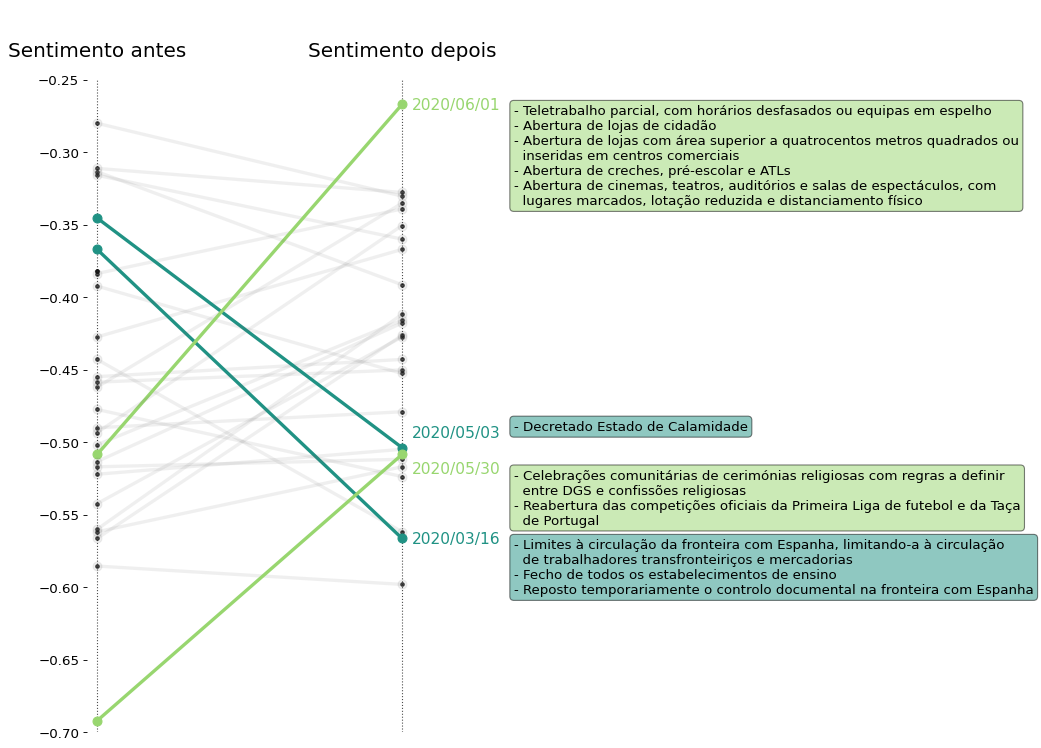

In [188]:
import matplotlib.lines as mlines

# colors
c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

# cols
sentiment_cols = ['before_sentiment', 'middle_sentiment', 'after_sentiment']
date_cols = ['before_date', 'middle_date', 'after_date']

# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)
y_ticks = [-0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25]

axis_left_pos = 1
axis_right_pos = 4

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color=True):
    ax = plt.gca()
    colorize = c[0]
    alpha = 0.1
    
    if color:
        alpha = 1
        if p1[-1]-p2[-1] > 0:
            colorize = c[1]
        else:
            colorize = c[3]
    
    l = mlines.Line2D([p1[0], p2[0]], 
                      [p1[-1], p2[-1]], 
                      color=colorize, 
                      alpha=alpha,
                      marker='o',
                      markersize=8,
                      linewidth=3)
    
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(10,12), dpi= 80)

# Vertical Lines
ax.vlines(x=axis_left_pos, ymin=-0.7, ymax=-0.25, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_right_pos, ymin=-0.7, ymax=-0.25, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['before_sentiment'],
           x=np.repeat(axis_left_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['after_sentiment'], 
           x=np.repeat(axis_right_pos, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'])):
    if (i < dates_size-2):
        if(abs(p[1]-p[0]) > 0.15):
            newline([axis_left_pos, p[0]], [axis_right_pos, p[1]])
            
            medidas_text = wrap_text(medidas[medidas['data'] == dates_middle[i]]['desc'].values)
            box_text = '\n'.join(medidas_text)
            
            if(p[1]-p[0] > 0):
                if(dates_middle[i] == '2020/05/30'):
                    ax.text(axis_right_pos+0.1, p[1]-0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1]-0.01, box_text, fontsize=12, verticalalignment='top', bbox=props, wrap=True)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1], box_text,fontsize=12, verticalalignment='top', bbox=props)
            else:
                if(dates_middle[i] == '2020/05/03'):
                    ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1]+0.01, box_text,fontsize=12, verticalalignment='bottom', bbox=props)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1], box_text,fontsize=12, verticalalignment='top', bbox=props)
        else:
            newline([axis_left_pos, p[0]], [axis_right_pos, p[1]], False)
    
# 'Before' and 'After' Annotations
ax.text(axis_left_pos, -0.23, 'Sentimento antes', horizontalalignment='center', verticalalignment='center', fontdict={'size':18})
ax.text(axis_right_pos, -0.23, 'Sentimento depois', horizontalalignment='center', verticalalignment='center', fontdict={'size':18})

# Decoration
ax.set(xlim=(0.9, 7), ylim=(-0.7, -0.2))
ax.set_xticks([])
plt.yticks(y_ticks, fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

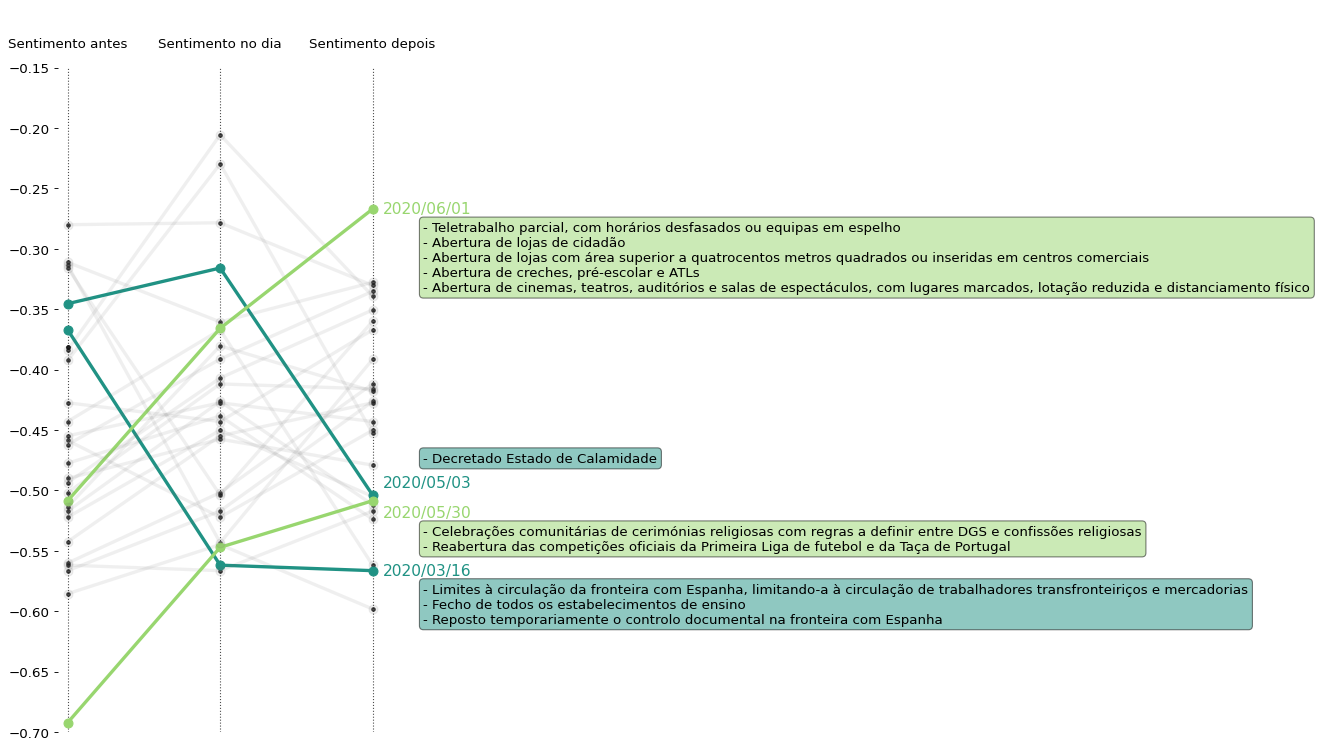

In [146]:
import matplotlib.lines as mlines

# colors
c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

# cols
sentiment_cols = ['before_sentiment', 'middle_sentiment', 'after_sentiment']
date_cols = ['before_date', 'middle_date', 'after_date']

# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)
y_ticks = [-0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2, -0.15]

axis_left_pos = 1
axis_right_pos = 4
axis_middle_pos = np.mean([axis_left_pos, axis_right_pos])

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p12, p2, color=True):
    ax = plt.gca()
    colorize = c[0]
    alpha = 0.1
    
    if color:
        alpha = 1
        if p1[-1]-p2[-1] > 0:
            colorize = c[1]
        else:
            colorize = c[3]
    
    l = mlines.Line2D([p1[0], p12[0], p2[0]], 
                      [p1[-1], p12[-1], p2[-1]], 
                      color=colorize, 
                      alpha=alpha,
                      marker='o',
                      markersize=8,
                      linewidth=3)
    
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(10,12), dpi= 80)

# Vertical Lines
ax.vlines(x=axis_left_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_middle_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_right_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['before_sentiment'],
           x=np.repeat(axis_left_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['middle_sentiment'],
           x=np.repeat(axis_middle_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['after_sentiment'], 
           x=np.repeat(axis_right_pos, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'], df['middle_sentiment'])):
    if (i < dates_size-2):
        if(abs(p[1]-p[0]) > 0.15):
            newline([axis_left_pos, p[0]], [axis_middle_pos, p[2]], [axis_right_pos, p[1]])
            
            medidas_text = medidas[medidas['data'] == dates_middle[i]]['desc'].values
            box_text = '\n'.join(['- ' + desc for desc in medidas_text])
            
            if(p[1]-p[0] > 0):
                if(dates_middle[i] == '2020/05/30'):
                    ax.text(axis_right_pos+0.1, p[1]-0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+0.5, p[1]-0.02, box_text, fontsize=12, verticalalignment='top', bbox=props, wrap=True)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+0.5, p[1]-0.01, box_text,fontsize=12, verticalalignment='top', bbox=props)
            else:
                if(dates_middle[i] == '2020/05/03'):
                    ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+0.5, p[1]+0.025, box_text,fontsize=12, verticalalignment='bottom', bbox=props)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+0.5, p[1]-0.01, box_text,fontsize=12, verticalalignment='top', bbox=props)
        else:
            newline([axis_left_pos, p[0]], [axis_middle_pos, p[2]], [axis_right_pos, p[1]], False)
    
# 'Before' and 'After' Annotations
ax.text(axis_left_pos, -0.13, 'Sentimento antes', horizontalalignment='center', verticalalignment='center', fontdict={'size':12})
ax.text(axis_middle_pos, -0.13, 'Sentimento no dia', horizontalalignment='center', verticalalignment='center', fontdict={'size':12})
ax.text(axis_right_pos, -0.13, 'Sentimento depois', horizontalalignment='center', verticalalignment='center', fontdict={'size':12})

# Decoration
ax.set(xlim=(0.9, 7), ylim=(-0.7, -0.1))
ax.set_xticks([])
plt.yticks(y_ticks, fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

In [71]:
medidas[medidas['data'] == '2020-03-16']

,data,local,tipo,desc
14,2020-03-16,Portugal,Medidas,"Limites à circulação da fronteira com Espanha,..."
15,2020-03-16,Portugal,Medidas,Fecho de todos os estabelecimentos de ensino
16,2020-03-16,Portugal,Medidas,Reposto temporariamente o controlo documental ...


In [72]:
medidas[medidas['data'] == '2020-05-03']

,data,local,tipo,desc
50,2020-05-03,Portugal,Calamidade,Decretado Estado de Calamidade


In [73]:
medidas[medidas['data'] == '2020-05-30']

,data,local,tipo,desc
88,2020-05-30,Portugal,Desconfinamento,Celebrações comunitárias de cerimónias religio...
89,2020-05-30,Portugal,Desconfinamento,Reabertura das competições oficiais da Primeir...


In [74]:
medidas[medidas['data'] == '2020-06-01']

,data,local,tipo,desc
90,2020-06-01,Portugal,Desconfinamento,"Teletrabalho parcial, com horários desfasados ..."
91,2020-06-01,Portugal,Desconfinamento,Abertura de lojas de cidadão
92,2020-06-01,Portugal,Desconfinamento,Abertura de lojas com área superior a quatroce...
93,2020-06-01,Portugal,Desconfinamento,"Abertura de creches, pré-escolar e ATLs"
94,2020-06-01,Portugal,Desconfinamento,"Abertura de cinemas, teatros, auditórios e sal..."


In [131]:
from collections import Counter
Counter("".join(tweets.text_clean).split(" ")).most_common(10)

[(',', 15406),
 ('de', 13913),
 ('a', 12604),
 ('o', 10852),
 ('que', 10372),
 ('.', 9805),
 ('e', 8517),
 ('do', 6246),
 ('em', 5183),
 ('não', 4762)]

In [464]:
months = [int(month) for month in sorted(tweets.date.dt.month.unique()[:-1])]

In [465]:
months

[1, 2, 3, 4, 5, 6, 8]

In [133]:
from nltk.corpus import stopwords

In [725]:
pt_stp_words = stopwords.words('portuguese')
pt_stp_words.extend(['pra', 'ter', 'dia', 'fazer', 'tudo', 'sobre'])
pt_stp_words.extend([',', '.', '!', '?', ':', '...',
                     '(', ')', '-', '``', '\'\'', '´´', '“',
                     '..', '”'])

In [726]:
#flatten_matrix = [val for sublist in matrix for val in sublist] 
vocab = [word.lower() for tweet in tweets.text_clean.values for word in tweet.split(' ') if word.lower() not in pt_stp_words]

In [727]:
word_counter = Counter(vocab)

In [728]:
word_counter.most_common(20)

[('corona', 6683),
 ('pandemia', 3105),
 ('covid-19', 2391),
 ('portugal', 1635),
 ('vírus', 1556),
 ('vai', 1376),
 ('coronavírus', 1374),
 ('ser', 1334),
 ('covid', 1274),
 ('q', 1228),
 ('covid19', 1184),
 ('casa', 1035),
 ('pessoas', 1023),
 ('agora', 983),
 ('covid_19', 965),
 ('todos', 928),
 ('casos', 749),
 ('ainda', 740),
 ('hoje', 717),
 ('coronavirus', 714)]

In [729]:
vocab_month = dict()
for month in months:
    subset = tweets[tweets.date.dt.month == month]
    vocab_month[month] = [word.lower() for tweet in subset.text_clean.values for word in tweet.split(' ') if word.lower() not in pt_stp_words]

In [730]:
counter_month = {month: Counter(vocab_month[month]) for month in months}

In [731]:
for month, vocab in counter_month.items():
    print(month)
    print(vocab.most_common(20))

1
[('corona', 146), ('coronavírus', 49), ('vírus', 36), ('china', 24), ('coronavirus', 23), ('portugal', 22), ('vai', 19), ('ser', 19), ('porto', 17), ('aqui', 16), ('virus', 13), ('casa', 13), ('agora', 12), ('q', 11), ('mundo', 11), ('jogar', 10), ('chegou', 10), ('ainda', 10), ('dizer', 9), ('braga', 9)]
2
[('corona', 478), ('vírus', 176), ('coronavírus', 150), ('portugal', 86), ('coronavirus', 73), ('virus', 66), ('vai', 52), ('q', 50), ('ser', 47), ('1', 43), ('agora', 40), ('casos', 37), ('caso', 37), ('causa', 35), ('vou', 35), ('aqui', 32), ('pessoas', 30), ('itália', 30), ('china', 29), ('tá', 27)]
3
[('corona', 4138), ('covid-19', 1067), ('vírus', 946), ('pandemia', 904), ('coronavírus', 835), ('portugal', 781), ('vai', 644), ('covid19', 639), ('covid_19', 605), ('casa', 593), ('ser', 587), ('q', 519), ('pessoas', 494), ('agora', 488), ('todos', 476), ('coronavirus', 420), ('covid19pt', 409), ('vou', 403), ('quarentena', 397), ('causa', 395)]
4
[('corona', 893), ('pandemia', 

In [732]:
most_common_vocab = list()
for month, vocab in counter_month.items():
    if month < 7:
        most_common_vocab.extend([tup[0] for tup in vocab.most_common(20)])

In [733]:
most_common_most_common = list(set(most_common_vocab))[:20]

In [734]:
most_common_most_common

['coronavírus',
 'covid',
 'vai',
 'covid19',
 'bem',
 'casa',
 'vírus',
 'q',
 'vou',
 'coronavirus',
 'aqui',
 'ser',
 'china',
 'tá',
 'pessoas',
 'pandemia',
 'quarentena',
 'covid_19',
 'caso',
 'agora']

In [735]:
plot_dict = dict()
for month, vocab in counter_month.items():
    if month < 7:
        plot_dict[month] = dict()
        words = [tup[0] for tup in vocab.most_common(20)]
        for word in most_common_most_common:
            if word in words:
                plot_dict[month][word] = vocab[word]
            else:
                plot_dict[month][word] = 0

In [736]:
x_list = list(range(1, 21)) * 6

In [737]:
y_list = list(range(1, 7)) * 20

In [738]:
len(x_list)

120

In [739]:
len(y_list)

120

In [740]:
count_list = list()
for tup in plot_dict.values():
    count_list.extend(list(dicty.values()))

In [741]:
len(count_list)

120

In [742]:
month_names = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

In [769]:
marker_list = [(count/20)**2 for count in count_list]

[(0.0, 7.0), (0.0, 22.0)]

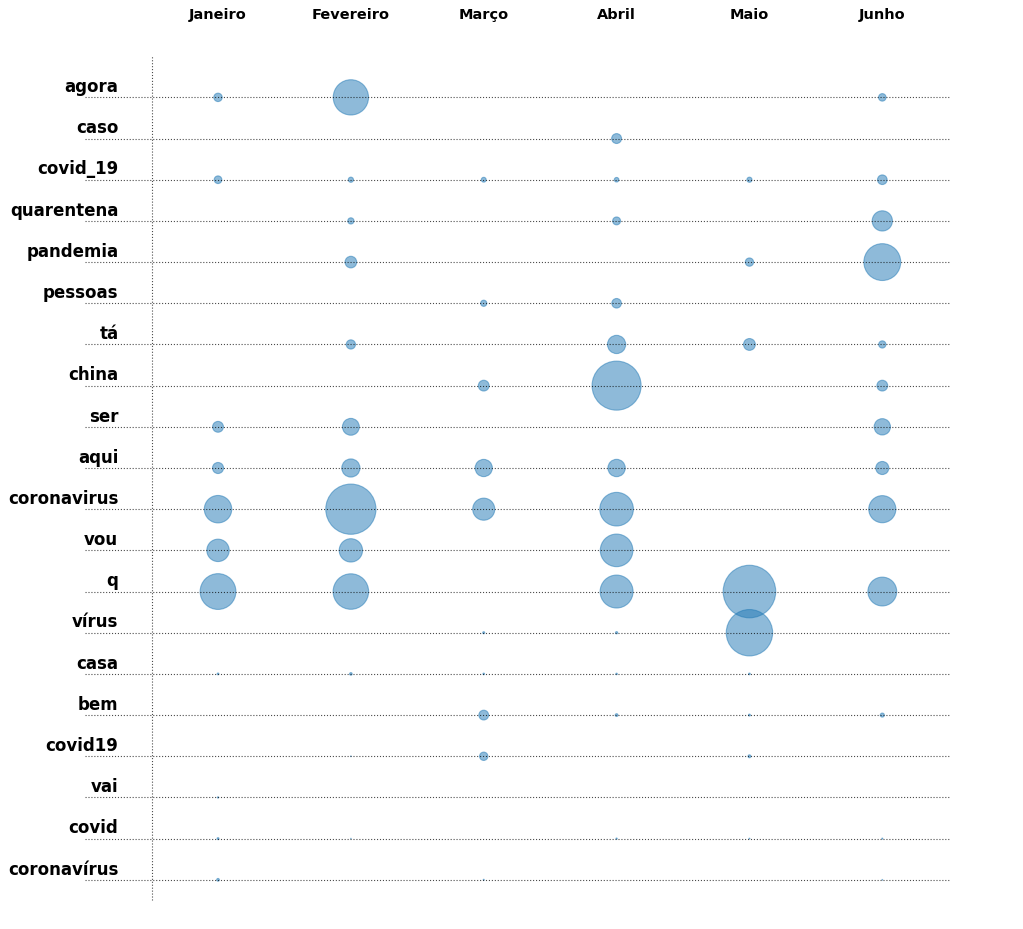

In [804]:
fig, ax = plt.subplots(1,1,figsize=(15,15), dpi= 80)
ax.scatter(y_list, sorted(x_list), marker_list, alpha=0.5)
plt.axis('off')
ax.vlines(x=0.5, ymin=0.5, ymax=21, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
for month in months:
    if month < 7:
        ax.text(month, 22, month_names[month-1], horizontalalignment='center', verticalalignment='center', fontdict={'size':13, 'weight':700})
        #ax.vlines(x=month+0.5, ymin=0.5, ymax=21, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
for i, word in enumerate(most_common_most_common):
    ax.text(0.25, i+1.25, str(word), horizontalalignment='right', verticalalignment='center', fontdict={'size':15, 'weight':700})
    ax.hlines(y=i+1, xmin=0, xmax=6.5, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
        # CENTERS
ax.set(xlim=(0, 7), ylim=(0, 22))